# Import Package and Data

In [121]:
import kagglehub

In [162]:
# fucntions related package
import os
import numpy as np
import pandas as pd
from zipfile import ZipFile
from sklearn.feature_extraction.text import TfidfVectorizer
# data visulization related package
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from collections import Counter

# supervised and unsupervised learning related package
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import LinearSVC
# evaluation related package
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


Github Link:https://github.com/QINFEISHENG/CSCA_5632_Unsupervised_ML_Final_Project_Wine_Review

# Gather data, determine the method of data collection and provenance of the data (3 points)

The dataset is sourced from Kaggle and I will focus on the two columns:

Description: Review of the wine , in text format.

Variety: The type or variety of the wine, in text format.

The objective is to predict the wine variety based on its description using unsupervised machine learning techniques.

Gather data :I get the data from kagglehub directly, this dataset have 3 files, one with 130,000 rows of data, one with 150,000 rows of data , and the columns that i am focusing on is description and variety.

method of data collection : The data original comes from https://www.wineenthusiast.com/?s=&search_type=shop then ZACKTHOUTT  collect and publish the data to kaggle.

provenance of the data : The data is from https://www.kaggle.com/datasets/zynicide/wine-reviews     by ZACKTHOUTT

In [123]:
# Download latest version
path = kagglehub.dataset_download("zynicide/wine-reviews")
# print the path to the dataset
print(path)

/kaggle/input/wine-reviews


In [124]:

# copy and paste the dataset and print what is inside  the folder
data_path = "/root/.cache/kagglehub/datasets/zynicide/wine-reviews/versions/4"

print(os.listdir(data_path))

['winemag-data-130k-v2.json', 'winemag-data_first150k.csv', 'winemag-data-130k-v2.csv']


#Identify an Unsupervised Learning Problem (6 points)

In this project, the unsupervised learning problem is to use the wine descriptions to group wines into their corresponding variety.

The steps:
1.	Use NLP techniques to convert the text-based description column into numbers.
3.	Apply PCA to reduce the dimensionality of the feature space while retaining the most important components.
4. Use KMeans models and NMF models to perform clustering.

The ultimate goal is to discover if the  text-based description  is sufficient to differentiate between different wine varieties.

#Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data (26 points)

 Go through the initial data cleaning and EDA and judge whether you need to collect more or different data.

In [125]:
# get the data with 130,000 rows
The_130k_data = os.path.join(data_path, "winemag-data-130k-v2.csv")

# point the df to the The_130k_data
df = pd.read_csv(The_130k_data)
# print the first few row
print(df.head())

   Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0              

In [126]:
# view the basic information of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [127]:
# only keep the description and variety data !!!
df = df[['description', 'variety']]
print(df.head())

                                         description         variety
0  Aromas include tropical fruit, broom, brimston...     White Blend
1  This is ripe and fruity, a wine that is smooth...  Portuguese Red
2  Tart and snappy, the flavors of lime flesh and...      Pinot Gris
3  Pineapple rind, lemon pith and orange blossom ...        Riesling
4  Much like the regular bottling from 2012, this...      Pinot Noir


In [128]:
# remove all the rows that have empty value
df = df.dropna()
# view the basic information of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129970 entries, 0 to 129970
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   description  129970 non-null  object
 1   variety      129970 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


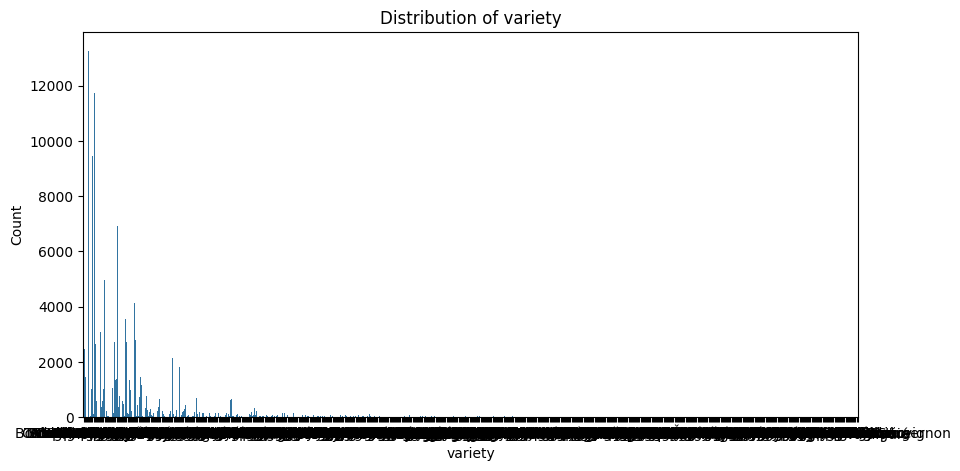

In [129]:
# view the plot of the distribution of the variety.
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='variety')
plt.ylabel('Count')
plt.title('Distribution of variety')
plt.show()

In [130]:
print(df['variety'].nunique())

707


Too many varieties , i gonna reduce the variety

In [131]:
# got only the top 7 varieties
top_varieties = df['variety'].value_counts().nlargest(7).index
# rewrite the df_top
df_top = df[df['variety'].isin(top_varieties)]

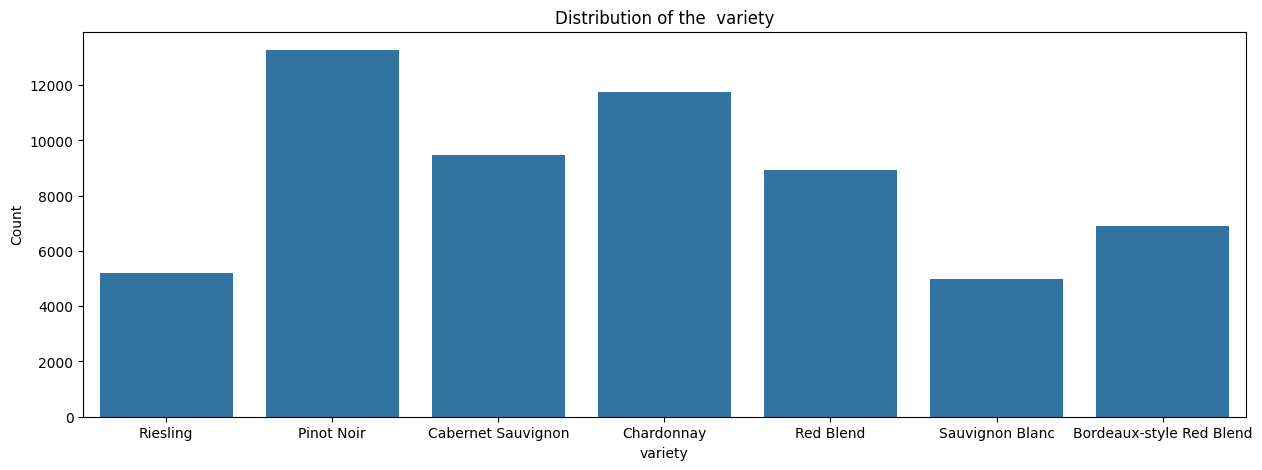

In [132]:
# view the plot of the distribution of the variety.
plt.figure(figsize=(15,5))
sns.countplot(data=df_top, x='variety')
plt.ylabel('Count')
plt.title('Distribution of the  variety')
plt.show()

Based on my experience, 'Riesling', 'Cabernet Sauvignon', 'Chardonnay' taste very different. Due to the limitation of the dataset size, I will only keep these wines for this project.

In [133]:
# select the varieties that taste different based on my experience.
target_varieties = ['Riesling', 'Cabernet Sauvignon', 'Chardonnay']
df_filtered = df[df['variety'].isin(target_varieties)].copy()
df_top=df_filtered

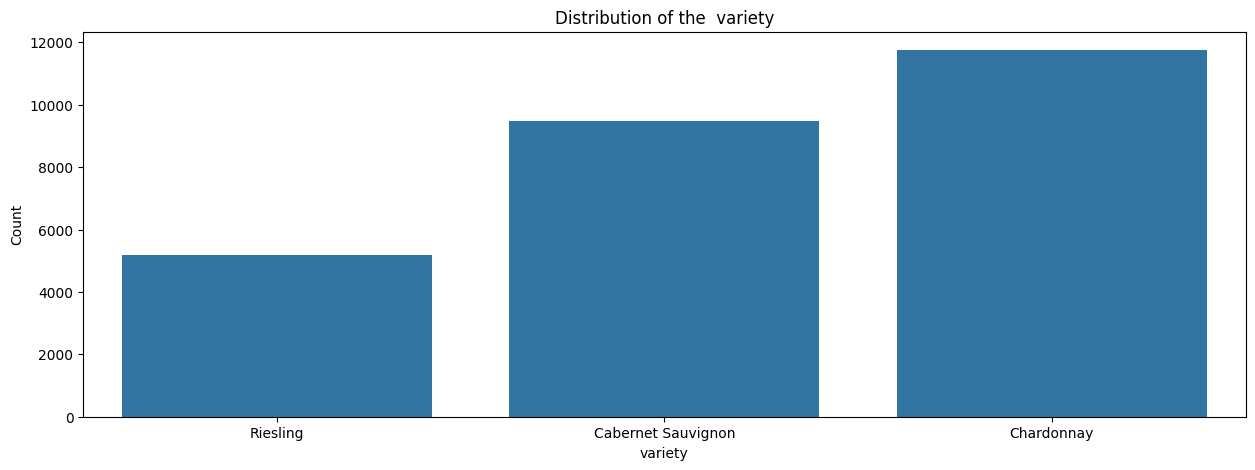

In [134]:
# view the plot of the distribution of the variety.
plt.figure(figsize=(15,5))
sns.countplot(data=df_top, x='variety')
plt.ylabel('Count')
plt.title('Distribution of the  variety')
plt.show()

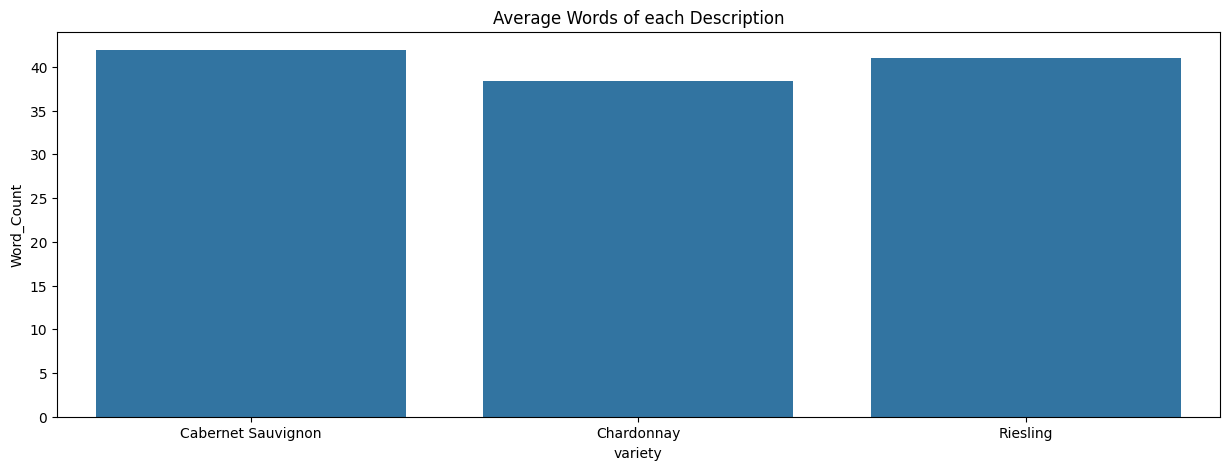

In [135]:
# add the Word_Count column
df_top['Word_Count'] = df_top['description'].apply(lambda x: len(x.split()))
# get the average words
average_words = df_top.groupby('variety')['Word_Count'].mean().reset_index()

# print the plot
plt.figure(figsize=(15, 5))
sns.barplot(data= average_words, x='variety', y='Word_Count')
plt.title('Average Words of each Description')
plt.show()

# Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions (70 points)

## TF-IDF

Use TF-IDF to conver the text into numeric data

In [136]:
# get the vectorizer
TF_IDF_Vectorizer = TfidfVectorizer(stop_words='english')

# conver the text into vector
TF_IDF_Vectors = TF_IDF_Vectorizer.fit_transform(df_top['description'])

# see the shape
print(TF_IDF_Vectors.shape)

(26414, 15040)


In [137]:
print(f"Now each description is represented by {TF_IDF_Vectors.shape[1]} values.")

Now each description is represented by 15040 values.


In [138]:
# see what the data looks like
print(TF_IDF_Vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 613120 stored elements and shape (26414, 15040)>
  Coords	Values
  (0, 9789)	0.1610909873501438
  (0, 11057)	0.2385705745257697
  (0, 7561)	0.13171245145990934
  (0, 9829)	0.23510929703322128
  (0, 9169)	0.1721954727645181
  (0, 1529)	0.21878333065408603
  (0, 12525)	0.25925117600814956
  (0, 893)	0.1117527054763875
  (0, 9388)	0.10428059258337756
  (0, 1444)	0.1780342975118007
  (0, 9166)	0.23535663607342158
  (0, 8943)	0.12924757592525193
  (0, 6495)	0.17264621006629463
  (0, 4168)	0.34543230111769735
  (0, 6109)	0.2616516115631616
  (0, 8007)	0.21416542003182923
  (0, 5807)	0.22998981337305957
  (0, 14652)	0.2150984962569436
  (0, 12053)	0.18922120279177335
  (0, 976)	0.25967807586350755
  (0, 11631)	0.3111048018513022
  (0, 5137)	0.09989393851870972
  (1, 12180)	0.11538415551799704
  (1, 13002)	0.19124738467768274
  (1, 9918)	0.1325890497352533
  :	:
  (26412, 6065)	0.23220783613559634
  (26412, 8516)	0.21447788396200387

## First Model Unsupervised ML  NMF

In [139]:
# get the unique variety
Unique_Variety = df_top['variety'].unique()
# init an empty disc
# this will be category to number for all the dataa
Variety_to_number = {}
index = 0
for variety in Unique_Variety:
    Variety_to_number[variety] = index
    index += 1

In [140]:
# map the Variety to numeric index
# the y will be the variety
# need to convert them into numeric
y_train_numeric = df_top['variety'].map(Variety_to_number)

# split the data into 20 test 80 train
X_train, X_test, y_train, y_test = train_test_split(
    # The x will be the description
    # the description has been converted to vectors by using the TF-IDF
    TF_IDF_Vectors, # the vector of text by using TD-IDF
    y_train_numeric,  # use the numeric y
    test_size=0.2,
    random_state=2025
)


In [141]:
# double check
print(Unique_Variety)

['Riesling' 'Cabernet Sauvignon' 'Chardonnay']


In [142]:
# double check
print(len(Unique_Variety))

3


In [143]:
### set the hyperparameter of topics
counts_of_varieties = len(Unique_Variety)

# creat the NMF modle
NMF_Model = NMF(n_components=counts_of_varieties, random_state=2025)

# the weight of the text on the topic
Weight_train = NMF_Model.fit_transform(X_train)


In [144]:
varity_train = Weight_train.argmax(axis=1)

# init a real varity dict
real_varity_mapping_train = {}


for varity in range(counts_of_varieties):
    true_varity = y_train[varity_train == varity]
    real_varity_mapping_train[varity] = np.bincount(true_varity).argmax()

y_train_predicted =[]

for category in varity_train:
  y_train_predicted.append(real_varity_mapping_train[category])

accuracy_train = accuracy_score(y_train, y_train_predicted)

# print the accuracy on the train data
print("Accuracy on Train data is")
print(accuracy_train)



Accuracy on Train data is
0.7781931759027022


Run a PCA to see if the data split well when represent by two most important components

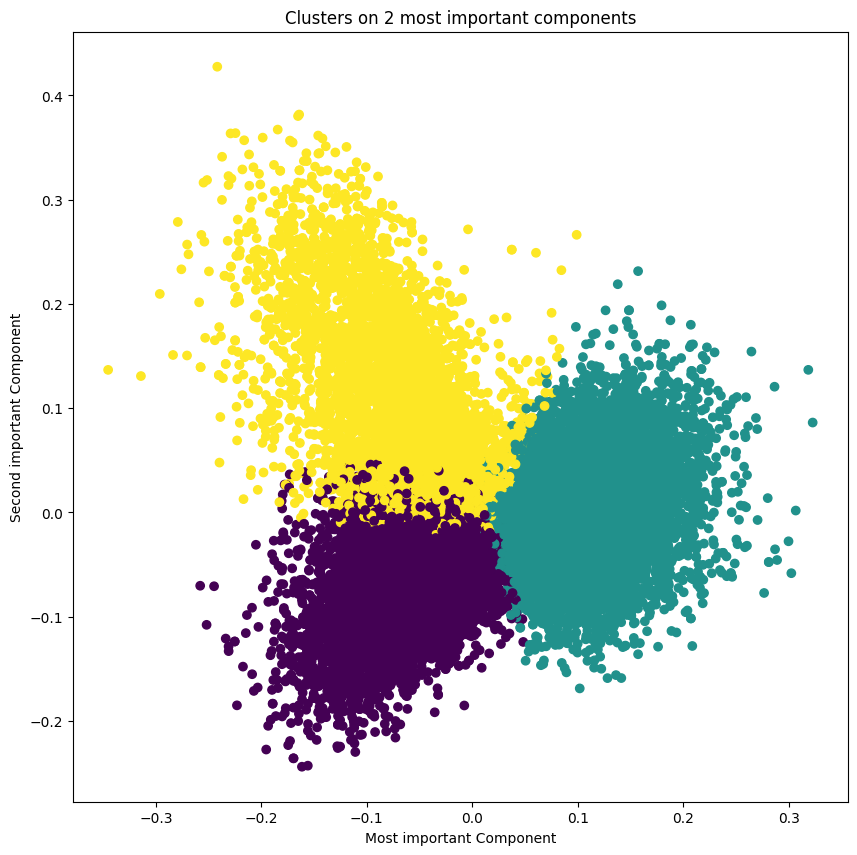

In [145]:
# get the pca data
PCA_Data = PCA(n_components=2)
# get the 2 most important
PCA_1_2 = PCA_Data.fit_transform(X_train)

plt.figure(figsize=(10, 10))

plt.scatter(PCA_1_2[:, 0], PCA_1_2[:,1], c = varity_train)
# set the title and the label
plt.title("Clusters on 2 most important components")
plt.xlabel("Most important Component")
plt.ylabel("Second important Component")
plt.show()

In [146]:
print(y_train.value_counts(normalize=True))

variety
2    0.445128
1    0.356774
0    0.198098
Name: proportion, dtype: float64


The result of accuracy is good , since it is better than random guess.

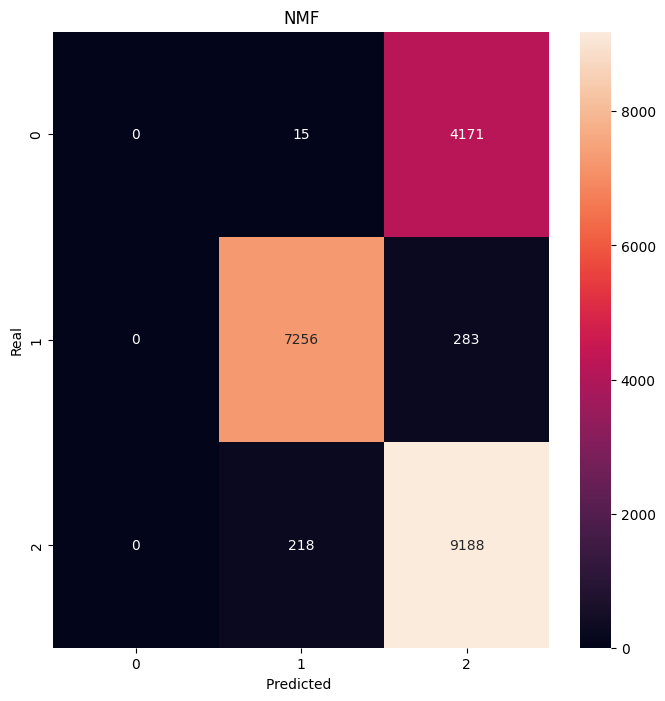

In [147]:
# get the confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_train_predicted)

plt.figure(figsize=(8, 8))

# show the heat map for the confusion matrix
sns.heatmap(confusion_matrix_train, annot=True, fmt='d')

# add some label and title
plt.title("NMF")
plt.xlabel("Predicted ")
plt.ylabel("Real")

# see the plt
plt.show()


In [148]:
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4186
           1       0.97      0.96      0.97      7539
           2       0.67      0.98      0.80      9406

    accuracy                           0.78     21131
   macro avg       0.55      0.65      0.59     21131
weighted avg       0.65      0.78      0.70     21131



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The Reuslt on the Confusion Matrix is bad, this is because the data is not balanced at all, need to fix this by using a different way of sampling.

## Second Model Unsupervised ML NMF with RandomOverSampler

The result is very bad because the data is not balanced.


In [149]:
# set the seed
ROS = RandomOverSampler(random_state=2025)

# get the ros version of x and y
X_ROS, y_ROS = ROS.fit_resample(TF_IDF_Vectors, y_train_numeric)

In [150]:
### set the hyperparameter of topics
counts_of_varieties = len(Unique_Variety)

# creat the NMF modle
NMF_Model_ROS = NMF(n_components=counts_of_varieties, random_state=2025)

# the weight of the text on the topic
Weight_train_ROS = NMF_Model_ROS.fit_transform(X_ROS)


In [151]:
varity_train = Weight_train_ROS.argmax(axis=1)

# init a real varity dict
real_varity_mapping_train = {}


for varity in range(counts_of_varieties):
    true_varity = y_ROS[varity_train == varity]
    real_varity_mapping_train[varity] = np.bincount(true_varity).argmax()

y_train_predicted =[]

for category in varity_train:
  y_train_predicted.append(real_varity_mapping_train[category])

accuracy_train = accuracy_score(y_ROS, y_train_predicted)

# print the accuracy on the train data
print("Accuracy on Train data is")
print(accuracy_train)



Accuracy on Train data is
0.8305397203550866


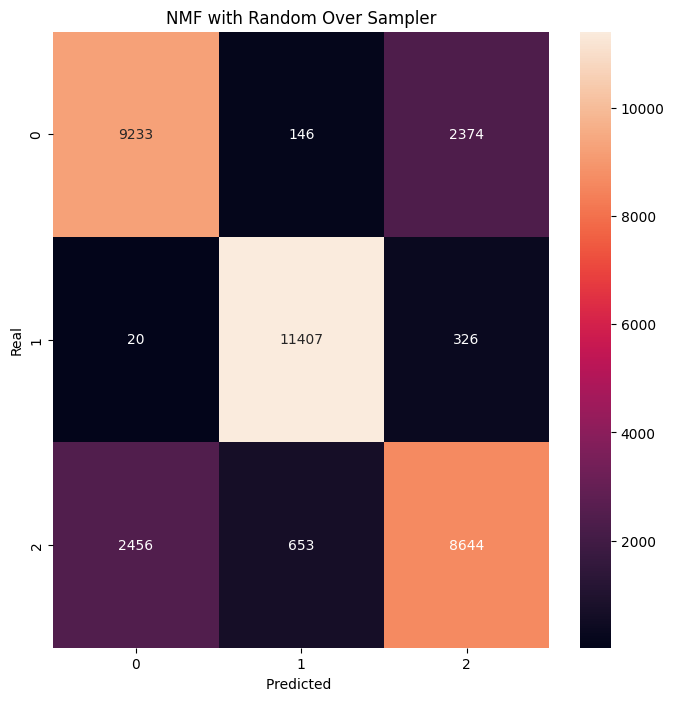

In [152]:
# create the confsution matrix
confusion_matrix_ROS = confusion_matrix(y_ROS, y_train_predicted)

plt.figure(figsize=(8, 8))

sns.heatmap(confusion_matrix_ROS, annot=True, fmt='d')

plt.title("NMF with Random Over Sampler")
plt.xlabel("Predicted ")
plt.ylabel("Real")

# see the plt
plt.show()


Now the result is much better , because now the data is balanced by using random over sampler

In [153]:
print(classification_report(y_ROS, y_train_predicted))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     11753
           1       0.93      0.97      0.95     11753
           2       0.76      0.74      0.75     11753

    accuracy                           0.83     35259
   macro avg       0.83      0.83      0.83     35259
weighted avg       0.83      0.83      0.83     35259



## Third Model Unsupervised ML  K means

In [154]:
#Double check the data
print (len(Unique_Variety))

3


In [155]:
# create a function to map the result to actual label
def majority_mapping(true_labels, predicted_labels):
    # must use numpy array
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)

    #init the dict for the lael ot map
    The_label_Map = {}
    # get all the unique predicted value
    all_labels = np.unique(predicted_labels)

    for label in all_labels:
        # mark those as the real label
        indicator = predicted_labels == label
        # get the real label
        true_label = true_labels[indicator]
        # get the majority
        majority_label = Counter(true_label).most_common(1)[0][0]
        # create the dict
        The_label_Map[label] = majority_label

    mapped_labels = []
    for predicted in predicted_labels:
        true_label = The_label_Map[predicted]
        mapped_labels.append(true_label)
    return np.array(mapped_labels)

In [156]:
# set the couts of clusters to 3
clusters_counts = len(Unique_Variety)

# create the model
K_Mean_Model = KMeans(n_clusters=clusters_counts, random_state=2025)
K_Mean_Predicted = K_Mean_Model.fit_predict(X_train)



y_predicted_matched = majority_mapping(y_train, K_Mean_Predicted)

# get the accuracy for the model
Accuracy_K_Mean = accuracy_score(y_train, y_predicted_matched)
print(Accuracy_K_Mean)


0.7904973735270455


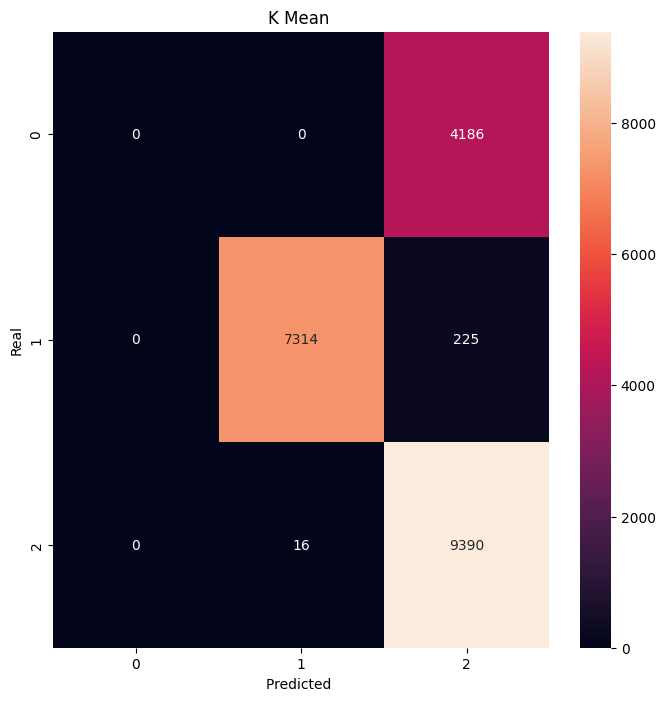

[[   0    0 4186]
 [   0 7314  225]
 [   0   16 9390]]


In [157]:
# create the confsution matrix
confusion_matrix_K_Mean = confusion_matrix(y_train, y_predicted_matched)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_K_Mean, annot=True, fmt='d')

plt.title("K Mean ")
plt.xlabel("Predicted ")
plt.ylabel("Real")

# see the plot
plt.show()
print(confusion_matrix_K_Mean)

In [158]:
print(classification_report(y_train, y_predicted_matched))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4186
           1       1.00      0.97      0.98      7539
           2       0.68      1.00      0.81      9406

    accuracy                           0.79     21131
   macro avg       0.56      0.66      0.60     21131
weighted avg       0.66      0.79      0.71     21131



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The result is not good, so for unsupervised models, the imbalance of the dataset will significantly affect the performance of the result.

While using the balanced data, the result will be good

In this next step , i will compare the result to the supervised ML model

## Fourth Model Supervised ML  SVM

In [159]:
## SVM Model


SVM_Model= LinearSVC()
SVM_Model.fit(X_train, y_train)

y_predicted = SVM_Model.predict(X_train)
print(accuracy_score(y_train, y_predicted))



0.9933746628176613


result are very good

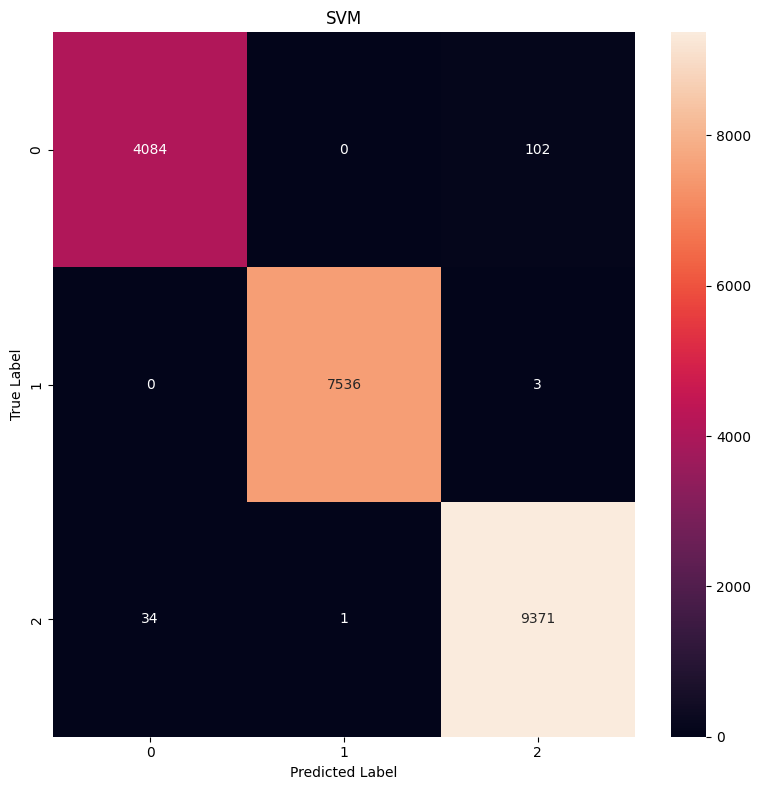

In [160]:
# get the predicted value from svm
y_predicted_svm = SVM_Model.predict(X_train)
confusion_matrix_svm = confusion_matrix(y_train, y_predicted_svm)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d')
# see the plot
plt.title("SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()

# see the plot
plt.show()

In [161]:
print(classification_report(y_train, y_predicted_svm))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4186
           1       1.00      1.00      1.00      7539
           2       0.99      1.00      0.99      9406

    accuracy                           0.99     21131
   macro avg       0.99      0.99      0.99     21131
weighted avg       0.99      0.99      0.99     21131



The result from SVM model is so much better than the unsupervised ML model

## Discussion and Conclusion



Unsupervised ML model are very sensitive to the size of the data and whether the data is balanced or not. when i try to run the data  on NMF model and K means model, the result are very bad, all two models lost the ability to predicted the Riesling wine, and this is because the size of resiline is only about 40% of the other two wines.
however , supervised learning , even for a very simple SVM model , have such a good performance, overal 99% accuracy.

Also, when I use the RandomOverSampler, which basically just duplicates the data from Riesling wine, the NMF model starts making sense and gives better results.

I use TF-IDF to convert the text information into numeric information,because it is easy to use,and it is pure unsupervised learning , all the information are extract from the data. Use Glove might improve the performance,but it also too big to upload each time i run the script,which will slow down the process.




# Link to the kaggle dataset
https://www.kaggle.com/datasets/zynicide/wine-reviews